In [93]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
import wave
import sys

%matplotlib inline

In [94]:
rate, data = wav.read('Recording.wav')

[]

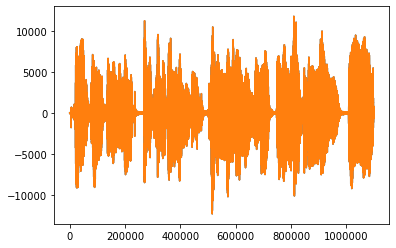

In [95]:
plt.plot(data)
plt.plot()

In [96]:
data
len(data)

1099776

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


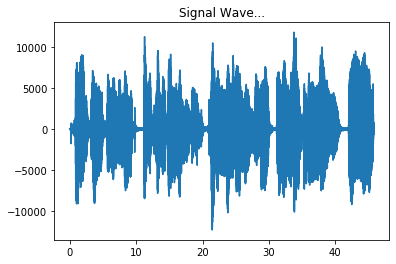

In [97]:
spf = wave.open('Recording.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.frombuffer(signal, 'Int16')

fs = spf.getframerate()
Time=np.linspace(0, len(signal)/fs, num=len(signal))

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(Time,signal)
plt.show()

In [98]:
signal

array([  0,   0,   0, ..., -15, -13, -13], dtype=int16)

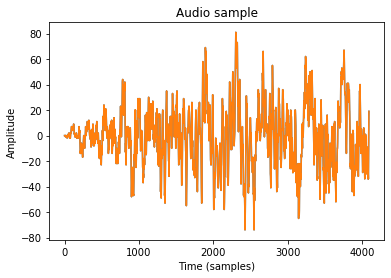

In [99]:
from scipy.io.wavfile import read
input_data = read("Recording.wav")
audio = input_data[1]

plt.plot(audio[0:4096])

plt.ylabel("Amplitude")
plt.xlabel("Time (samples)")
 # set the title
plt.title("Audio sample")
# display the plot
plt.show()

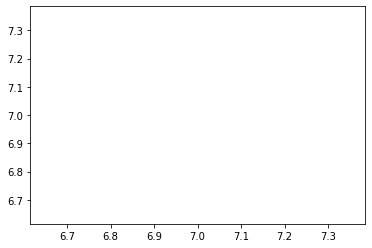

In [100]:
plt.plot(audio[:][100], audio[:][100])

In [101]:
x_axis = []
y_axis = []
for x, y in audio:
    y_axis.append(y)

In [102]:
x_axis = np.arange(0, len(y_axis))

<BarContainer object of 1024 artists>

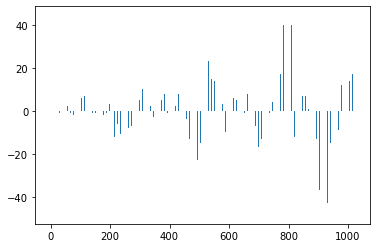

In [103]:
plt.bar(x_axis[0:1024], y_axis[0:1024], bottom=0, width=0.2)

In [104]:
xts = np.arange(0, len(y_axis))

In [105]:
len(xts)

1099776

In [106]:
xts = np.arange(0, len(y_axis), r).astype('int')

In [107]:
#Sampling
Fs = 1000
Ts = 1 / Fs
txs = np.arange(0, Ts)
r = np.round(len(y_axis)/ len(txs))

xts = np.arange(0, len(y_axis)).astype('int')

In [108]:
xts

array([      0,       1,       2, ..., 1099773, 1099774, 1099775])

<BarContainer object of 1024 artists>

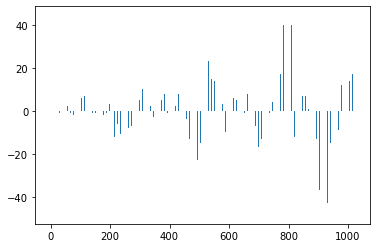

In [109]:
plt.bar(xts[0:1024], y_axis[0:1024],bottom=0, width=0.2)

In [110]:
ys = np.array(y_axis)

In [111]:
ys

array([  0,   0,   0, ..., -15, -15, -13], dtype=int16)

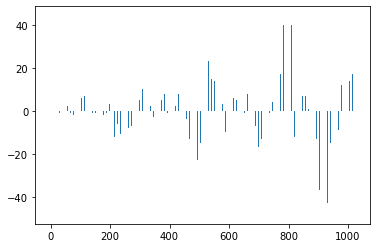

In [112]:
plt.bar(xts[0:1024], ys[0:1024], bottom=0, width=0.2)
plt.show()

In [113]:
# minmax normalization
ys = (ys - ys.min()) / (ys.max() - ys.min())

In [24]:
ys

array([0.51001324, 0.51001324, 0.51001324, ..., 0.50939259, 0.50939259,
       0.50947534])

<BarContainer object of 10240 artists>

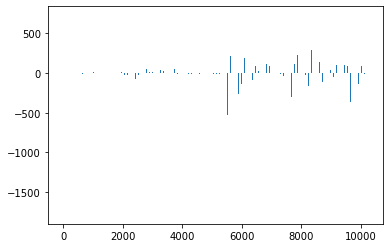

In [25]:
plt.bar(xts[0:10240], y_axis[0:10240], bottom=0, width=0.2)

In [26]:
y_axisNumpy = np.array(y_axis)

In [27]:
print(y_axisNumpy.max())
print(y_axisNumpy.min())

11842
-12326


In [28]:
ys = np.array(y_axis)

In [29]:
ys.max()

11842

In [30]:
ys.round()

array([  0,   0,   0, ..., -15, -15, -13], dtype=int16)

In [31]:
ys *= 16384

In [32]:
ys

array([     0,      0,      0, ...,  16384,  16384, -16384], dtype=int16)

<BarContainer object of 1024 artists>

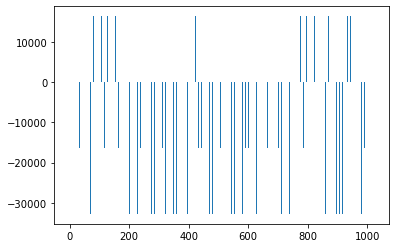

In [33]:
plt.bar(x_axis[0:1024], ys[0:1024], bottom=0, width=0.2)

In [34]:
def ADC(numpy_array):
    numpy_array = numpy_array.astype('int64')
    for i in range(0, len(numpy_array)):
        #print(numpy_array[i])
        numpy_array[i] = bin(numpy_array[i]).replace('0b', '')
    return numpy_array

In [35]:
ys = ADC(ys)

In [36]:
ys.max()

100000000000000

In [37]:
ys.min()

-1000000000000000

<BarContainer object of 1024 artists>

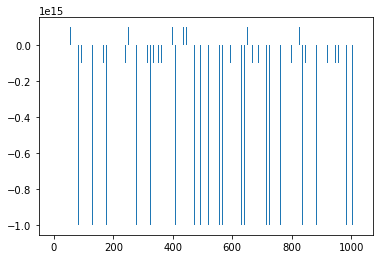

In [38]:
plt.bar(x_axis[:1024], ys[:1024], bottom=0, width=0.2)

In [39]:
def lengthNormalizer(numpy_array):
    output_array = []
    for i in range(0, len(numpy_array)):
        output_array.append(format(numpy_array[i], '015d'))
    return output_array

In [40]:
ys

array([               0,                0,                0, ...,
        100000000000000,  100000000000000, -100000000000000], dtype=int64)

In [41]:
ys[23121]

100000000000000

In [42]:
ys = lengthNormalizer(ys)

In [43]:
max(ys)

'100000000000000'

In [44]:
min(ys)

'-100000000000000'

In [45]:
ys

['000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '-100000000000000',
 '-100000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '-100000000000000',
 '-100000000000000',
 '-100000000000000',
 '-100000000000000',
 '-100000000000000',
 '-100000000000000',
 '-100000000000000',
 '-100000000000000',
 '-100000000000000',
 '-100000000000000',
 '-100000000000000',
 '-100000000000000',
 '-100000000000000',
 '-1000000000000000',
 '-1000000000000000',
 '-100000000000000',
 '-100000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '000000000000000',
 '-100000000000000',
 '-100000000000000',
 '000000000000000',
 '000000000000000',
 '100000000000000

In [125]:
from matplotlib.pyplot import step, show 
from matplotlib.animation import FuncAnimation
import random
from itertools import count

In [121]:
bina = "0001110101"
def encoder(b):
    l = []
    l.append(int(b[0]))
    for i in range(0,len(b)):
        if(b[i]=='0'):
            l.append(0)
        else:
            l.append(1)
        x = np.arange(0, len(l))
        y = np.array(l)
    step(x, y)
    plt.show()
    return x,y
            

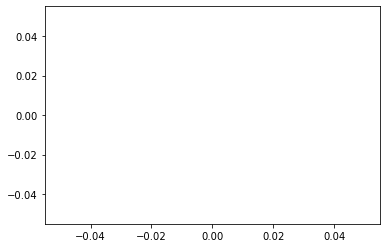

In [134]:
x1 = []
y1 = []
index = count()
def animate(i):
    x1.append(next(index))
    y1.append(random.randint(0,1))
    plt.plot(x1, y1)
    plt.show()
    
    
ani = FuncAnimation(plt.gcf(),animate,interval = 1000)

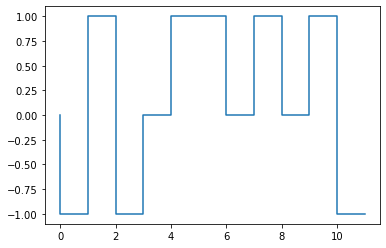

In [77]:
data = [0,-1,1,-1,0,1,1,0,1,0,1,-1]
xaxis = np.arange(0, len(data))
yaxis = np.array(data)
step(xaxis, yaxis)
show()

In [70]:
a = '0'
print(int(a))


0


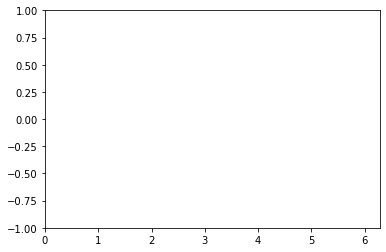

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()